Multiple Linear Regression-ADVERTISING

TV, Radyo ve Gazete ilanlarına göre satış rakamları var.
Buradan Sales Sütunu hedef yani y=df['Sales']. TV, radyo ve gazeteye ayrı ayrı ne kadar yatırım yaparsam satış rakamlarım ne kadar artar sorusuna cevap arayacaksınız ve Hangi reklam yönteminin daha başarılı olduğunu bulacaksınız. Test olarak ayırdığınız veri ile tahmin ettiğiniz veriyi aynı grafikte line chart ile görselleştireceksiniz.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv("advertising.csv")

In [ ]:
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [ ]:
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


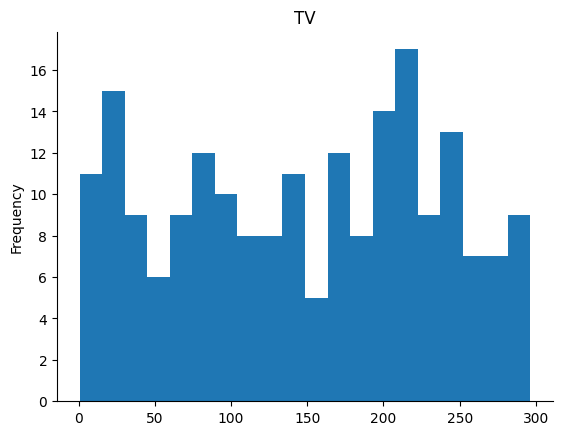

In [ ]:
# @title TV

from matplotlib import pyplot as plt
df['TV'].plot(kind='hist', bins=20, title='TV')
plt.gca().spines[['top', 'right',]].set_visible(False)

<Axes: >

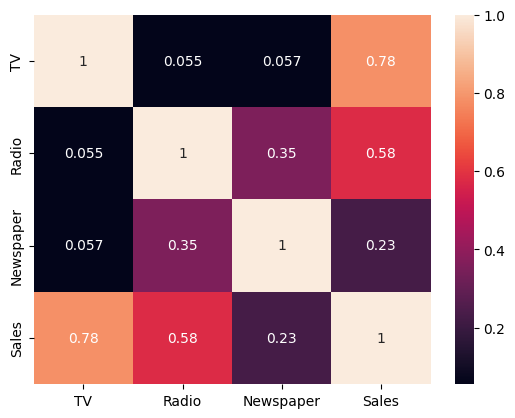

In [ ]:
sns.heatmap(df.corr(numeric_only=True),annot=True)

In [ ]:
x=df.drop(['Sales'],axis=1)
y=df['Sales']

In [ ]:
from sklearn.model_selection import train_test_split,cross_val_score

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=42)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",100)

from sklearn.linear_model import LinearRegression,SGDRegressor,Ridge,Lasso,ElasticNet
from sklearn.neighbors import KNeighborsRegressor, RadiusNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor,AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor, plot_tree, ExtraTreeRegressor
#pip install xgboost
from xgboost import XGBRegressor
from sklearn.svm import SVR

from sklearn.neural_network import MLPRegressor

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

from sklearn.preprocessing import StandardScaler


def algo_test(x,y):
        #Bütün modelleri tanımlıyorum
        L=LinearRegression()
        R=Ridge()
        Lass=Lasso()
        E=ElasticNet()
        sgd=SGDRegressor()
        ETR=ExtraTreeRegressor()
        GBR=GradientBoostingRegressor()
        kn=KNeighborsRegressor()
        rkn=RadiusNeighborsRegressor(radius=1.0)
        ada=AdaBoostRegressor()
        dt=DecisionTreeRegressor()
        xgb=XGBRegressor()
        svr=SVR()
        mlp_regressor = MLPRegressor()



        algos=[L,R,Lass,E,sgd,ETR,GBR,ada,kn,dt,xgb,svr,mlp_regressor]
        algo_names=['Linear','Ridge','Lasso','ElasticNet','SGD','Extra Tree','Gradient Boosting',
                    'KNeighborsRegressor','AdaBoost','Decision Tree','XGBRegressor','SVR','mlp_regressor']

        x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=.20,random_state=42)

        r_squared= []
        rmse= []
        mae= []

        #Hata ve doğruluk oranlarını bir tablo haline getirmek için bir dataframe oluşturuyorum
        result=pd.DataFrame(columns=['R_Squared','RMSE','MAE'],index=algo_names)


        for algo in algos:
            p=algo.fit(x_train,y_train).predict(x_test)
            r_squared.append(r2_score(y_test,p))
            rmse.append(mean_squared_error(y_test,p)**.5)
            mae.append(mean_absolute_error(y_test,p))



        #result adlı tabloya doğruluk ve hata oranlarımı yerleştiriyorum
        result.R_Squared=r_squared
        result.RMSE=rmse
        result.MAE=mae

       #oluşturduğum result tablosunu doğruluk oranına (r2_score) göre sıralayıp dönüyor
        rtable=result.sort_values('R_Squared',ascending=False)
        return rtable

In [ ]:
algo_test(x,y)

,R_Squared,RMSE,MAE
Gradient Boosting,9.832881e-01,7.262836e-01,6.125225e-01
XGBRegressor,9.724704e-01,9.321655e-01,7.258288e-01
KNeighborsRegressor,9.649788e-01,1.051378e+00,8.462431e-01
Extra Tree,9.629478e-01,1.081434e+00,8.100000e-01
Decision Tree,9.302598e-01,1.483661e+00,1.032500e+00
AdaBoost,9.106204e-01,1.679625e+00,1.189000e+00
Lasso,9.004013e-01,1.773046e+00,1.452202e+00
ElasticNet,8.999612e-01,1.776959e+00,1.456659e+00
Ridge,8.994381e-01,1.781599e+00,1.460766e+00
Linear,8.994380e-01,1.781600e+00,1.460757e+00


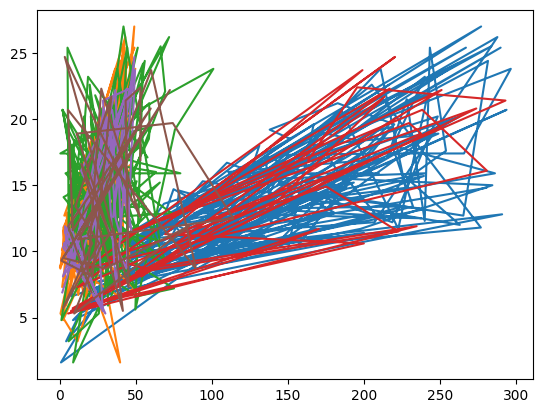

In [ ]:
ax=plt.plot(x_train,y_train)
ax=plt.plot(x_test,y_test)

In [ ]:
x = df[['TV']]
y = df[['Sales']]

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=42)

In [ ]:
algo_test(x,y)

,R_Squared,RMSE,MAE
Gradient Boosting,7.059406e-01,3.046567e+00,2.320881e+00
AdaBoost,6.883625e-01,3.136304e+00,2.337000e+00
Linear,6.766954e-01,3.194472e+00,2.444420e+00
Ridge,6.766953e-01,3.194473e+00,2.444421e+00
ElasticNet,6.765254e-01,3.195312e+00,2.446259e+00
Lasso,6.763679e-01,3.196090e+00,2.447934e+00
KNeighborsRegressor,6.746177e-01,3.204721e+00,2.456512e+00
SVR,6.478772e-01,3.333806e+00,2.619841e+00
Decision Tree,6.239497e-01,3.445214e+00,2.705000e+00
XGBRegressor,5.664691e-01,3.699161e+00,2.796138e+00


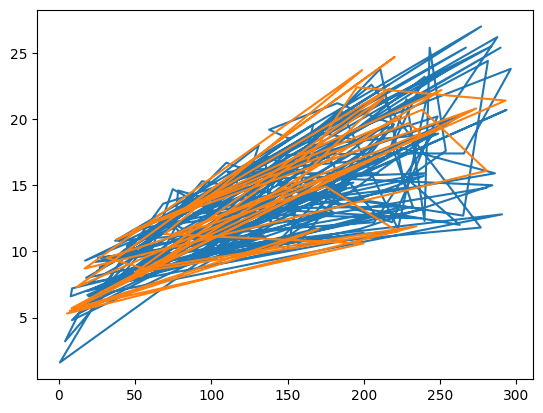

In [ ]:
ax=plt.plot(x_train,y_train)
ax=plt.plot(x_test,y_test)

In [ ]:
x = df[['Radio']]
y = df[['Sales']]

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=42)

In [ ]:
algo_test(x,y)

,R_Squared,RMSE,MAE
AdaBoost,0.297081,4.710272,3.439000
KNeighborsRegressor,0.277471,4.775523,3.865434
Lasso,0.263978,4.819906,3.936002
ElasticNet,0.263796,4.820503,3.933558
Ridge,0.263432,4.821695,3.929887
Linear,0.263431,4.821697,3.929879
SVR,0.171389,5.114093,4.040464
Gradient Boosting,0.139957,5.210186,3.828691
XGBRegressor,0.103954,5.318122,3.825073
Extra Tree,-0.010133,5.646542,4.411250


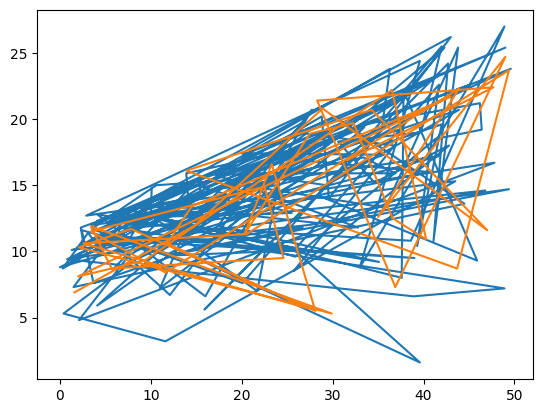

In [ ]:
ax=plt.plot(x_train,y_train)
ax=plt.plot(x_test,y_test)

In [ ]:
x = df[['Newspaper']]
y = df[['Sales']]

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=42)

In [ ]:
algo_test(x,y)

,R_Squared,RMSE,MAE
SVR,1.067738e-01,5.309748,4.502723
Lasso,3.163272e-02,5.528576,4.788111
ElasticNet,3.083725e-02,5.530846,4.785325
Ridge,2.987246e-02,5.533598,4.782196
Linear,2.987175e-02,5.533600,4.782194
AdaBoost,2.761136e-02,5.540043,4.700000
KNeighborsRegressor,-8.636249e-03,5.642356,4.793660
Gradient Boosting,-2.472238e-01,6.274302,5.100776
XGBRegressor,-4.852403e-01,6.846862,5.551375
Decision Tree,-5.786617e-01,7.058912,5.553333


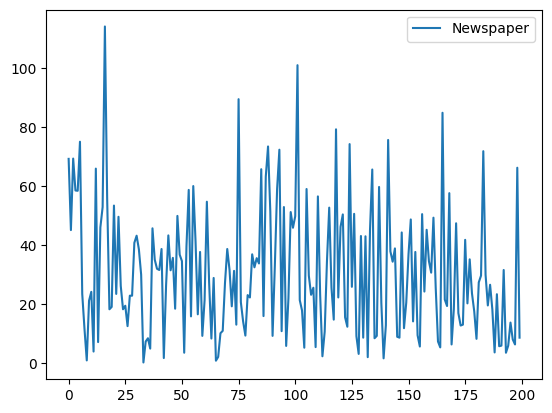

In [ ]:
sns.lineplot(x);

In [ ]:
import matplotlib.pyplot as plt

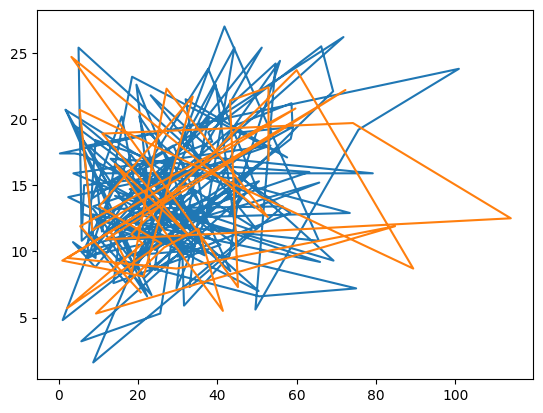

In [ ]:
ax=plt.plot(x_train,y_train)
ax=plt.plot(x_test,y_test)

SONUC: SATIŞLARI EN ÇOK ARTTIRAN TELEVİZYON REKLAMLARI SONRA RADYO VE EN SONDA DA GAZETE REKLAMLARI YER ALIYOR.